In [21]:
# Area, bedrooms, age are called independent variables or feature where as price is the dependet variable. 
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [22]:
# read teh data from CSV file. 
df = pd.read_csv('homeprices.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [23]:
# data proessing: Fill NA values with the median value of a column
import math
med_bedrooms = math.floor(df.bedrooms.median())

In [24]:
#fill the Nan data with the median value
df.bedrooms = df.bedrooms.fillna(med_bedrooms)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [25]:
#building the model and fit the model
reg = linear_model.LinearRegression()
reg.fit(df[['area', 'bedrooms', 'age']], df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
#find the coefficiant
reg.coef_

array([   112.06244194,  23388.88007794,  -3231.71790863])

In [27]:
#find the intercept 
reg.intercept_

221323.00186540425

In [28]:
#find the home price with 3000 sqr ft area, 3 bedrooms and 40 year old
reg.predict([[3000, 3, 40]])

array([ 498408.25158031])

In [29]:
#find the home price with 3000 sqr ft area, 3 bedrooms and 40 year old
(112.06244194*3000) + (23388.88007794*3) + (-3231.71790863*40) + 221323.00186540425

498408.25157402427

In [30]:
#find the home price with 2500 sqr ft area, 4 bedrooms and  5 years old
reg.predict([[2500, 4, 5]])

array([ 578876.03748933])

In [31]:
#reading the 
home_df = pd.read_csv('homepricesNew.csv')
home_df.head()

,area,bedrooms,age
0,2500,8,12
1,2700,6,8
2,3500,7,21
3,2300,5,14
4,4500,6,5


In [32]:
p = reg.predict(home_df)
p

array([ 649809.53244066,  638371.13230774,  709397.63312716,
        550766.96800115,  849778.68152948,  712374.57613038])

In [33]:
home_df['prices'] = p
home_df

,area,bedrooms,age,prices
0,2500,8,12,649809.532441
1,2700,6,8,638371.132308
2,3500,7,21,709397.633127
3,2300,5,14,550766.968001
4,4500,6,5,849778.681529
5,3900,3,5,712374.576130


ValueError: shapes (6,4) and (3,) not aligned: 4 (dim 1) != 3 (dim 0)

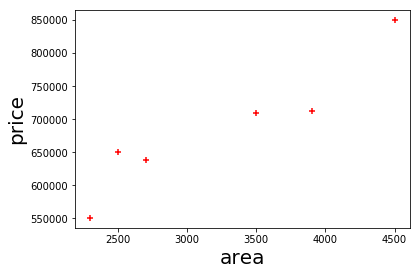

In [35]:
#plotting the scatter plot
%matplotlib inline
plt.xlabel('area', fontsize=20)
plt.ylabel('price', fontsize=20)
plt.scatter(home_df.area, home_df.prices, color='red', marker='+')
plt.plot(home_df.area, reg.predict(home_df), color='blue')